In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn import metrics

In [36]:
df = pd.read_csv('../data/real_dataset.csv')

In [39]:
df.sample(frac=0.25)

,playlist,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,...,loudness_pl,speechiness_pl,acousticness_pl,instrumentalness_pl,liveness_pl,valence_pl,tempo_pl,duration_ms_pl,time_signature_pl,belongs
44912,Walk-In & Set-Break Music - Phish 3.0,0.547,0.300,5.0,-11.581,0.0273,0.75200,0.000000,0.1010,0.516,...,-10.660063,0.065657,0.443523,0.214370,0.196412,0.559107,120.125730,240614.064043,3.867245,True
141193,Beats,0.623,0.571,4.0,-9.832,0.0288,0.11200,0.000307,0.1600,0.323,...,-10.276565,0.076319,0.319698,0.209667,0.192871,0.494447,121.565630,238402.103053,3.938931,False
71365,Kitchen Sink,0.345,0.534,4.0,-10.765,0.0315,0.06080,0.000609,0.1170,0.144,...,-10.045530,0.070316,0.281205,0.261698,0.198590,0.436014,121.834133,257281.474653,3.870008,True
85678,AAAAAAAAAAAAAAA,0.284,0.417,0.0,-12.666,0.0516,0.72900,0.013300,0.1510,0.332,...,-14.543001,0.054739,0.669936,0.341548,0.192864,0.459314,117.532535,275920.981818,3.849697,True
40102,SlyVinyl's-2013 Good Albums List,0.593,0.453,7.0,-15.144,0.0389,0.02810,0.897000,0.0805,0.360,...,-10.524261,0.065818,0.330144,0.250172,0.183490,0.449789,119.554641,244598.242261,3.885599,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35955,30th Party Dubstep Room,0.780,0.701,7.0,-5.279,0.0396,0.00269,0.001680,0.2240,0.250,...,-9.821549,0.071398,0.291195,0.279791,0.201028,0.474025,123.891519,236833.939914,3.858369,False
94374,freddeboos.se,0.376,0.597,5.0,-8.384,0.0306,0.00121,0.127000,0.1390,0.339,...,-9.246816,0.079026,0.259354,0.189015,0.209611,0.477730,119.106216,253082.491892,3.897297,True
116873,christmas,0.298,0.978,7.0,-5.394,0.1010,0.00184,0.132000,0.2870,0.280,...,-12.878755,0.049372,0.646579,0.149586,0.185244,0.446165,116.315652,201922.408759,3.787713,True
89960,Rolling Stones,0.554,0.844,11.0,-11.174,0.0508,0.01050,0.029100,0.1840,0.757,...,-11.382648,0.057549,0.444795,0.196690,0.172302,0.435399,117.019611,239662.070837,3.872125,False


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144416 entries, 0 to 144415
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   danceability         144416 non-null  float64
 1   energy               144416 non-null  float64
 2   key                  144416 non-null  float64
 3   loudness             144416 non-null  float64
 4   speechiness          144416 non-null  float64
 5   acousticness         144416 non-null  float64
 6   instrumentalness     144416 non-null  float64
 7   liveness             144416 non-null  float64
 8   valence              144416 non-null  float64
 9   tempo                144416 non-null  float64
 10  duration_ms          144416 non-null  float64
 11  time_signature       144416 non-null  float64
 12  danceability_pl      144416 non-null  float64
 13  energy_pl            144416 non-null  float64
 14  key_pl               144416 non-null  float64
 15  loudness_pl      

In [3]:
try:
    y = df['belongs']
    df.drop(['belongs', 'playlist'], axis=1, inplace=True)
    x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
except KeyError:
    x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

In [4]:
hist = HistGradientBoostingClassifier()
hist.fit(x_train, y_train)
y_pred = hist.predict(x_test)

In [41]:
clf = RandomForestClassifier(n_estimators=300, max_depth=23, random_state=0, max_features='log2', min_samples_split=4, min_samples_leaf=2)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [42]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred)*100)

Accuracy:  58.72455338595762


In [0]:
etc = ExtraTreesClassifier(n_estimators=100, max_depth=29, random_state=0, max_features='log2')
etc.fit(x_train, y_train)
y_pred = etc.predict(x_test)

In [0]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred)*100)

In [8]:
from sklearn.model_selection import cross_val_score
import numpy as np

print(np.mean(cross_val_score(clf, x_test, y_test, cv=3, scoring='accuracy')))
print(np.mean(cross_val_score(clf, x_test, y_test, cv=3, scoring='f1')))
print(np.mean(cross_val_score(clf, x_test, y_test, cv=3, scoring='precision')))
print(np.mean(cross_val_score(clf, x_test, y_test, cv=3, scoring='recall')))

0.5654687716382772


KeyboardInterrupt: 

In [10]:
from sklearn.metrics import accuracy_score

def precision_recall_score(pred, true):
    tp = 0
    fp = 0
    fn = 0
    for (p, t) in zip(pred, true):
        if t == 0:
            if p == 0:
                tp += 1
            else:
                fn += 1
        else:
            if p == 0:
                fp += 1
    return tp/(tp+fp), tp/(tp+fn)

accuracy = accuracy_score(y_pred, y_test)
precision, recall = precision_recall_score(y_pred, y_test)
f1 = (precision*recall)/(precision+recall)

print(f'Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1: {f1}')

Accuracy: 0.5863800027696995
Precision: 0.58984375
Recall: 0.5822488466570268
F1: 0.29301084583665404


[[8516 6007]
 [5915 8446]]


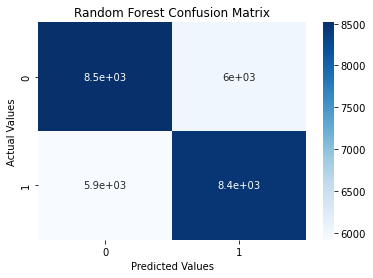

In [44]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Random Forest Confusion Matrix');
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values');
tmp = ax.get_figure()
tmp.savefig("../omni/app/static/images/conf_mat_rf.png")